<a href="https://colab.research.google.com/github/ApoorvaNagarajan/functionalDNN/blob/master/apoorva_quiz7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import datetime

print(datetime.datetime.now())

Using TensorFlow backend.


2019-06-11 14:25:33.518371


In [14]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, Input
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-11 14:47:35.641078


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 0s 0us/step
2019-06-11 14:25:38.600106


(60000, 28, 28)
2019-06-11 14:25:40.727901


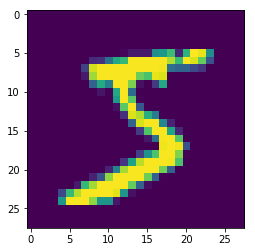

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-11 14:25:43.742006


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-11 14:25:44.650889


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-06-11 14:25:46.733089


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-11 14:25:47.874819


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-11 14:25:50.199162


In [23]:
## MAIN BLOCK

from keras.layers import Activation
from keras.layers import Activation, Flatten, Dense, Dropout, Input, concatenate, add
from keras.layers.convolutional import Conv2D, MaxPooling2D, DepthwiseConv2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

x1 = Input(shape=(28,28,1))

x2 = Conv2D(32, (3, 3), padding='same')(x1) # RF: 3x3, op res: 28x28
x2_bn = BatchNormalization()(x2)
x2_act = Activation('relu')(x2_bn)

added_x1x2 = add([x1,x2_act])

x3 = Conv2D(32, (3, 3), padding='same')(added_x1x2) # RF: 5x5,  op res:28x28
x3_bn = BatchNormalization()(x3)
x3_act = Activation('relu')(x3_bn)

added_x1x2x3 = add([x1,x2_act,x3_act])

x4 = MaxPooling2D((2,2))(added_x1x2x3) #RF : 10x10,  op res:14x14

x5 = Conv2D(32, (3, 3), padding='same')(x4) # RF : 12x12,  op res:14x14
x5_bn = BatchNormalization()(x5)
x5_act = Activation('relu')(x5_bn)

added_x4x5 = add([x4,x5])

x6 = Conv2D(32, (3, 3), padding='same')(added_x4x5) # RF 14x14,  op res: 14x14
x6_bn = BatchNormalization()(x6)
x6_act = Activation('relu')(x6_bn)

added_x4x5x6 = add([x4,x5_act,x6_act])

x7 = Conv2D(32, (3, 3), padding='same')(added_x4x5x6) # RF 16x16,  op res: 14x14
x7_bn = BatchNormalization()(x7)
x7_act = Activation('relu')(x7_bn)

added_x5x6x7 = add([x5_act,x6_act,x7_act])

x8 = MaxPooling2D((2,2))(added_x5x6x7) # RF 32x32,  op res: 7x7

x9 = Conv2D(32, (3, 3), padding='same')(x8) # RF 34x34,  op res: 7x7
x9_bn = BatchNormalization()(x9)
x9_act = Activation('relu')(x9_bn)

added_x8x9 = add([x8,x9_act])

x10 = Conv2D(32, (3, 3), padding='same')(added_x8x9) # RF 36x36,  op res: 7x7
x10_bn = BatchNormalization()(x10)
x10_act = Activation('relu')(x10_bn)

added_x8x9x10 = add([x8,x9_act,x10_act])

x11 = Conv2D(32, (3, 3), padding='same')(added_x8x9x10) # RF 38x38,  op res: 7x7
x11_bn = BatchNormalization()(x11)
x11_act = Activation('relu')(x11_bn)

x12 = Conv2D(10, (7,7))(x11_act)

x12_flat = Flatten()(x12)
out = Activation('softmax')(x12_flat)

model = Model(inputs=[x1], outputs=[out])


print(datetime.datetime.now())

2019-06-11 14:50:43.890510


In [24]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 28, 28, 32)   320         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 28, 28, 32)   128         conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 28, 28, 32)   0           batch_normalization_16[0][0]     
__________________________________________________________________________________________________
add_12 (Ad

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-11 14:51:10.250034


In [26]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 49s 817us/step - loss: 0.0961 - acc: 0.9714
Epoch 2/10
60000/60000 [==============================] - 44s 730us/step - loss: 0.0390 - acc: 0.9876
Epoch 3/10
60000/60000 [==============================] - 44s 737us/step - loss: 0.0307 - acc: 0.9906
Epoch 4/10
60000/60000 [==============================] - 44s 731us/step - loss: 0.0236 - acc: 0.9922
Epoch 5/10
60000/60000 [==============================] - 43s 721us/step - loss: 0.0205 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0161 - acc: 0.9948
Epoch 7/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.0131 - acc: 0.9958
Epoch 8/10
60000/60000 [==============================] - 44s 727us/step - loss: 0.0125 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 43s 723us/step - loss: 0.0102 - acc: 0.9967
Epoch 10/10
60000/60000 [==============================] - 43s 721us/step - loss: 

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-11 14:58:38.527844


In [28]:
print(score)
print(datetime.datetime.now())

[0.031951732304739196, 0.9916]
2019-06-11 14:58:38.540247
